#Analysis of the Fitzhugh Nagumo Model

##No Extensions are performed

###Import all necissary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from JSAnimation import IPython_display
from matplotlib import animation
from scipy.integrate import odeint
from scipy.signal import argrelextrema
%matplotlib inline

###Initialize Constants

In [2]:
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0 #ms
numpoints = 10*stoptime
times = np.linspace(0,stoptime,numpoints)

###Initialize Variables

In [3]:
alpha = 0.01;
beta = 0.5;
c = 0.1;
z = 0.5;

In [4]:
#Derrivatives
def dV(V,W,alpha,z):
    return V*(alpha+V)*(1-V)-W+z
def dW(V,W,beta,c):
    return beta*V - c*W

#Nullclines
def nullV(alpha,V):
    return -V**3 + (1-alpha)*V**2 + alpha*V +z
def nullW(beta,c,V):
    return beta*V/c

#Bulk derrivative for ode solver
def derr_func(var,t,p):
    alpha,beta,c,z = p
    V, W = var
    f = [V*(alpha+V)*(1-V)-W+z, beta*V - c*W]
    return f

#calculate frequency of model
def calc_freq(t,V):
    max_pts = argrelextrema(V,np.greater)[0]
    time_pts = t[max_pts]
    return 1.0/np.diff(time_pts)[-1]

###Sample Run of Model

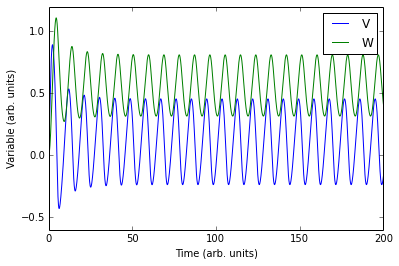

In [5]:
#use ode solver
p = [alpha, beta, c, z]
w0 = [0,0]


wsol = odeint(derr_func, [0,0], times, args=([alpha,beta,c,z],),atol=abserr, rtol=relerr)
V = wsol[:,0]
W = wsol[:,1]
plt.plot(times,V)
plt.plot(times,W)
plt.xlabel('Time (arb. units)')
plt.ylabel('Variable (arb. units)')
plt.legend(['V','W'])

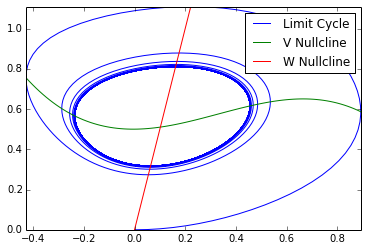

In [6]:
#phase plane
plt.plot(V,W)
Vs = np.linspace(min(V),max(V),100)
V_nullcline = nullV(alpha,Vs)
W_nullcline = nullW(beta,c,Vs)

plt.plot(Vs,V_nullcline)
plt.plot(Vs,W_nullcline)
plt.xlim([min(V),max(V)])
plt.ylim([min(W),max(W)])

plt.legend(['Limit Cycle','V Nullcline','W Nullcline'])


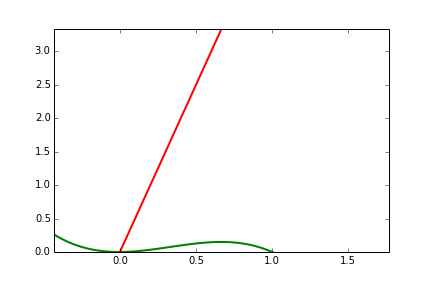
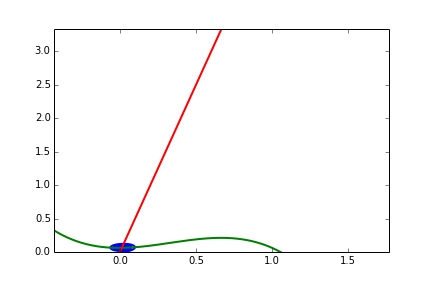
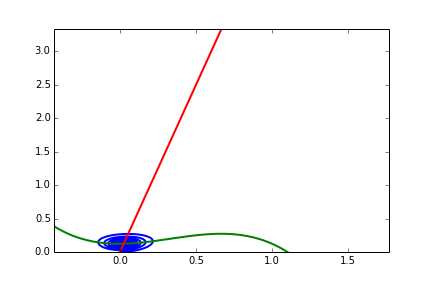
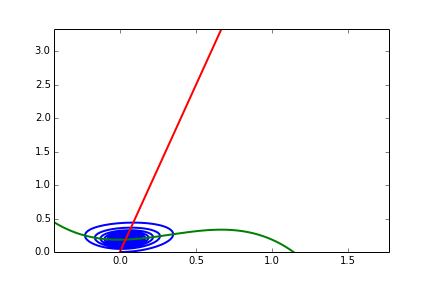
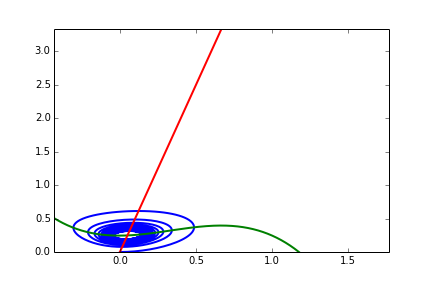
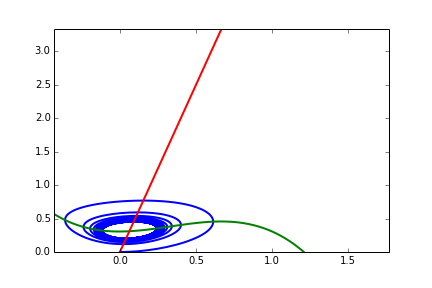
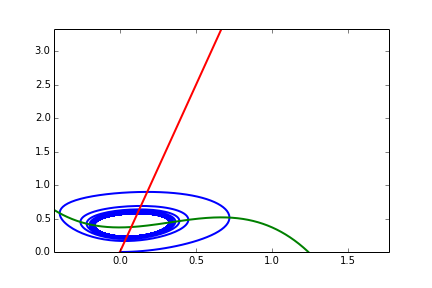
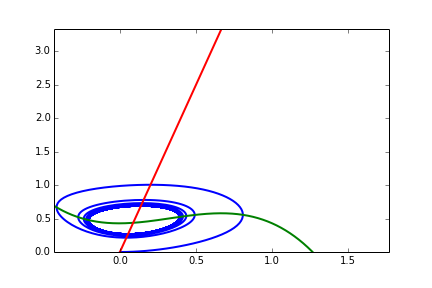
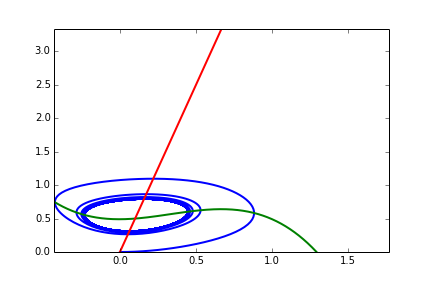
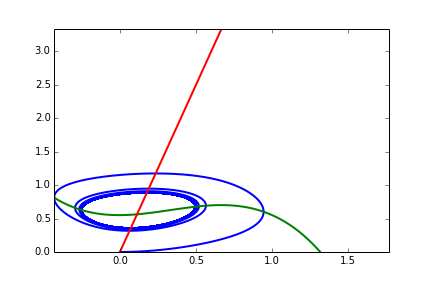
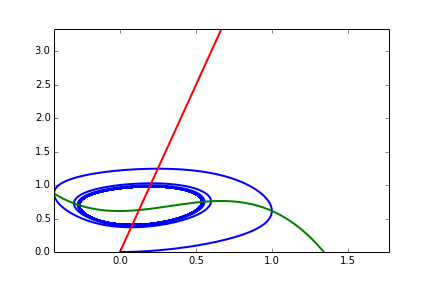
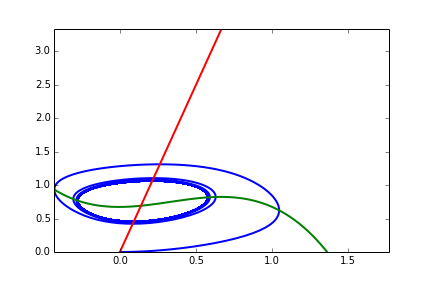
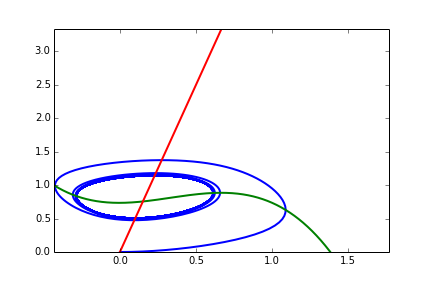
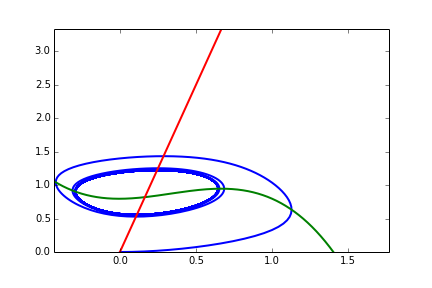
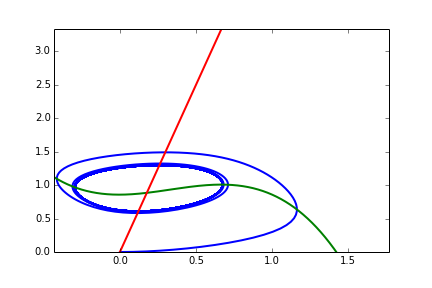
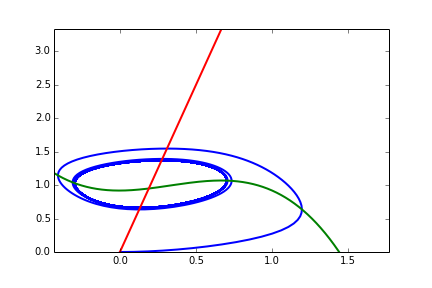
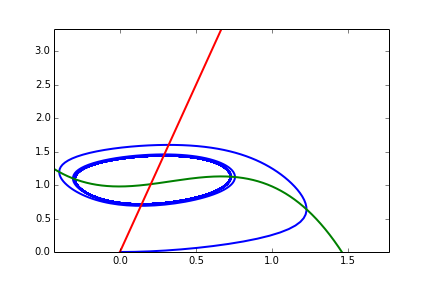
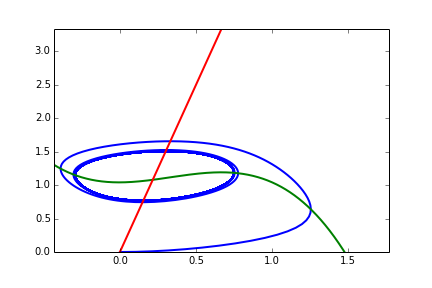
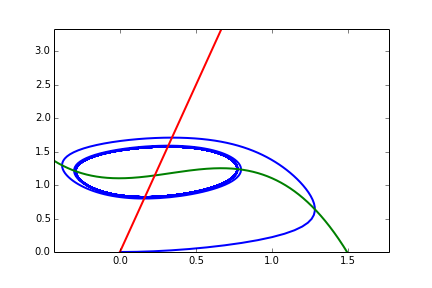
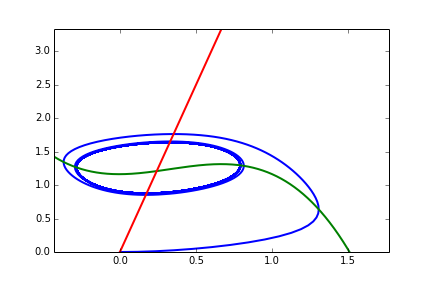

In [7]:
n_z = 50
zs = np.linspace(0,3,n_z)
V_loop = np.zeros((n_z,np.size(V)))
W_loop = np.zeros((n_z,np.size(W)))

null_Vs = np.linspace(-2,2,10000)
nullclines = np.zeros((2,n_z,len(null_Vs)))
for ix,z in enumerate(zs):
    wsol = odeint(derr_func, [0,0], times, args=([alpha,beta,c,z],),atol=abserr, rtol=relerr)
    V = wsol[:,0]
    W = wsol[:,1]
    V_loop[ix,:] = V
    W_loop[ix,:] = W
    nullclines[0,ix,:] = nullV(alpha,null_Vs)
    nullclines[1,ix,:] = nullW(beta,c,null_Vs)
    
#First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
V_lim = (np.min(np.min(V_loop)),np.max(np.max(V_loop)))
W_lim = (np.min(np.min(W_loop)),np.max(np.max(W_loop)))

ax = plt.axes(xlim=V_lim, ylim=W_lim)

lines = []
for i in [0,1,2]:
    lines.append(ax.plot([],[],lw=2)[0])
def init():
        lines[0].set_data([], [])
        lines[1].set_data([], [])
        lines[2].set_data([], [])
        return lines,

def animate(i):
    V = V_loop[i,:]
    W = W_loop[i,:]
    lines[0].set_data(V, W)
    lines[1].set_data(null_Vs,nullclines[0,i,:])
    lines[2].set_data(null_Vs,nullclines[1,i,:])
    return lines


animation.FuncAnimation(fig, animate, init_func=init,frames=20, interval=100, blit=True)

###Stability analysis at $z=0$

Taking the initial model

$$\begin{align}
f(x) &= \dot{V} = V(\alpha + V)(1-V) -W +z \\
g(x) &= \dot{W} = \beta V -cW
\end{align}
$$


We evaluate thejacobian matrix

$$
\overrightarrow{J} = \begin{bmatrix}
    \frac{\partial f}{\partial{V}} & \frac{\partial f}{\partial{W}} \\
    \frac{\partial g}{\partial{V}} & \frac{\partial g}{\partial{W}} \\
\end{bmatrix} = 
\begin{bmatrix}
    -V^2+(\alpha+1)V -\alpha & -1 \\
    \beta & -c \\
\end{bmatrix}
$$

At rest $V=W=z=0 \Rightarrow $
$$
\begin{bmatrix}
    -\alpha & -1 \\
    \beta & -c \\    
\end{bmatrix}
$$

This implies that eigenvalues $\lambda_{1,2}$ may be complex or not

$$
\lambda_{1,2} = \frac{1}{2} \pm \sqrt{\alpha^2 -2\alpha c -4\beta -c^2}-\alpha-c
$$

Halp! Should we say anything about this?

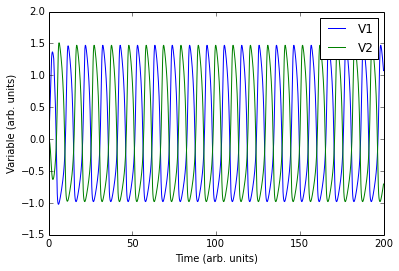

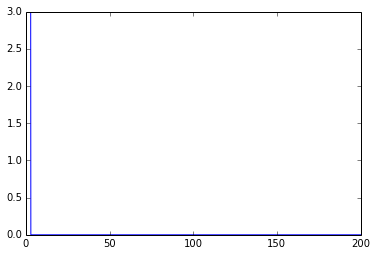

In [22]:
#Bulk derrivative for ode solver
def derr_func_coup(var,t,p):
    alpha,beta,c,z,gamma = p
    V1,V2,W1,W2 = var
    G_bar = 0.5
    f = [V1*(alpha+V1)*(1-V1)-W1+z*(t<3)+G_bar*(1-gamma)*(V1-V2),
         V2*(alpha+V2)*(1-V2)-W2+G_bar*(1-gamma)*(V2-V1),
         beta*V1 - c*W1,
         beta*V2 - c*W2]
    return f


p = [alpha, beta, c, z,0]
w0 = [0,0,0,0]
wsol = odeint(derr_func_coup, [0,0,0,0], times, args=([alpha,beta,c,0.5,0],),atol=abserr, rtol=relerr)
V1 = wsol[:,0]
V2 = wsol[:,1]
plt.plot(times,V1)
plt.plot(times,V2)
plt.xlabel('Time (arb. units)')
plt.ylabel('Variable (arb. units)')
plt.legend(['V1','V2'])

plt.figure()
plt.plot(times,z*(times<3))


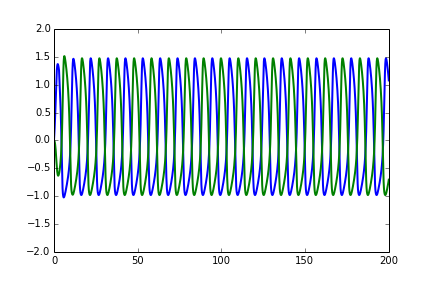
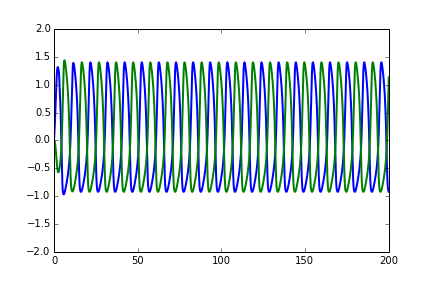
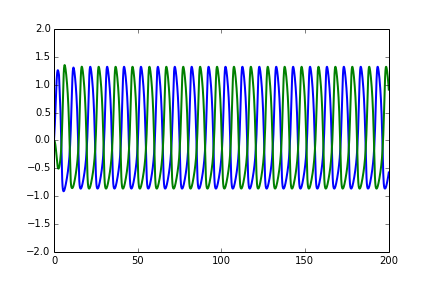
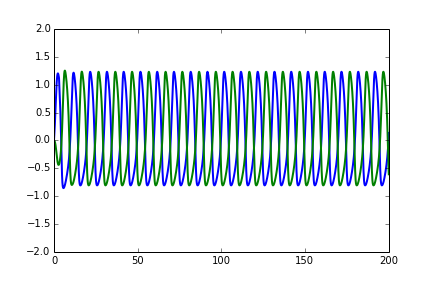
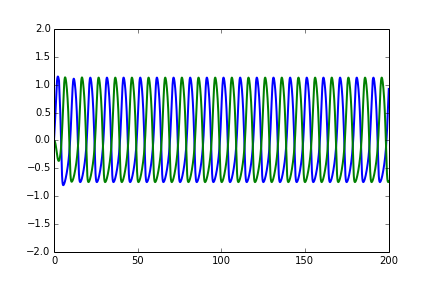
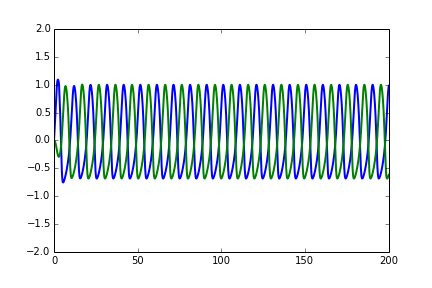
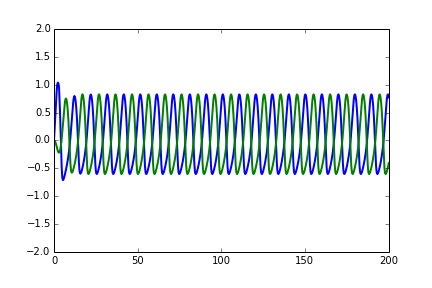
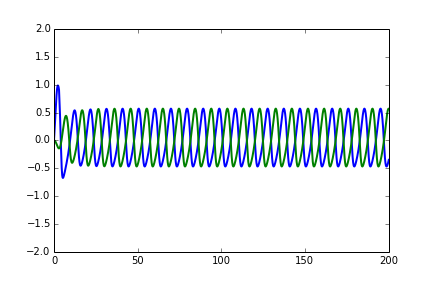
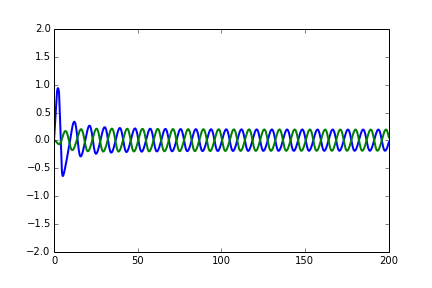
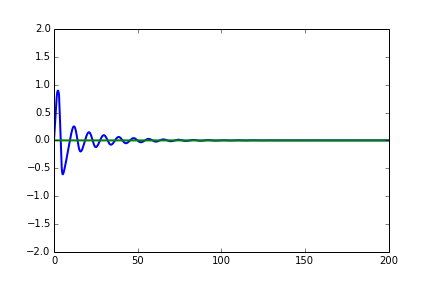

In [27]:
n_gamma = 10
gammas = np.linspace(0,1,n_gamma)
V1_loop = np.zeros((n_gamma,np.size(V1)))
V2_loop = np.zeros((n_gamma,np.size(V2)))
for ix,gamma in enumerate(gammas):
    p = [alpha, beta, c, z,gamma]
    w0 = [0,0,0,0]
    wsol = odeint(derr_func_coup, [0,0,0,0], times, args=([alpha,beta,c,0.5,gamma],),atol=abserr, rtol=relerr)
    V1 = wsol[:,0]
    V2 = wsol[:,1]
    V1_loop[ix,:] = V1
    V2_loop[ix,:] = V2
    

    
#First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0,200), ylim=(-2,2))

lines = []
for i in [0,1]:
    lines.append(ax.plot([],[],lw=2)[0])
def init():
        lines[0].set_data([], [])
        lines[1].set_data([], [])
        return lines,

def animate(i):
    V1 = V1_loop[i,:]
    V2 = V2_loop[i,:]
    lines[0].set_data(times,V1)
    lines[1].set_data(times,V2)
    return lines


animation.FuncAnimation(fig, animate, init_func=init,frames=n_gamma, interval=100, blit=True)